In [1]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from math import log, exp, sqrt, sin, cos, pi
%matplotlib inline

def rotcov(cov, th):
    th = np.deg2rad(th)
    R = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
    return R.dot(cov).dot(R.T)

def bookstyle(ax):
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    ax.set_xticks([])
    ax.set_yticks([])

def tf(x, y, th):
    th = np.deg2rad(th)
    R = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
    t = np.array([[x], [y]])
    return R, t

def ell(xy, cov, ax, n_std, facecolor='none', **kwargs):
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor=facecolor, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(xy[0], xy[1])
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def nm(cov):
    ed = np.linalg.eig(cov)
    if (ed[0][0] < ed[0][1]):
        return ed[1][:, 0]
    else:
        return ed[1][:, 1]

In /home/ee904/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ee904/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ee904/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ee904/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ee904/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

## NDT Figures

In [2]:
# NDT
def NDTFigures(up, cp, uq, cq):
    upq = up - uq
    cpq = cp + cq

    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    bookstyle(ax)
    ell(up, cp, ax, 1, edgecolor='r', label='$p\;(1\sigma)$')
    ell(uq, cq, ax, 1, edgecolor='g', label='$q\;(1\sigma)$')
    ax.scatter(*up, c='r')
    ax.scatter(*uq, c='g')
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect('equal')
    ax.legend(loc='upper right')

    ax = fig.add_subplot(132)
    bookstyle(ax)
    ell(upq, cpq, ax, 1, edgecolor='r', label='$p - q\;(1\sigma)$')
    ell(upq, cpq, ax, 2, edgecolor='g', label='$p - q\;(2\sigma)$')
    ell(upq, cpq, ax, 3, edgecolor='b', label='$p - q\;(3\sigma)$')
    ax.scatter(*upq)
    ax.plot([-2.8 * upq[0], 5 * upq[0]], [-2.8 * upq[1], 5 * upq[1]], c='purple', label='')
    ax.set_xlim(-1.7, 3)
    ax.set_ylim(-1.7, 3)
    ax.set_aspect('equal')
    ax.legend()

    ax = fig.add_subplot(133)
    bookstyle(ax)
    xmin, xmax = -2 * upq, 5 * upq
    x = np.linspace(-2 * upq, 5 * upq, 100)
    y = scipy.stats.multivariate_normal(upq, cpq).pdf(x)
    ax.plot([0, 0], [0, scipy.stats.multivariate_normal(upq, cpq).pdf([0, 0])], 'b:', lw=3, label='cost')
    ax.plot(np.linspace(-2/7, 5/7, 100), y, c='purple', label='pdf')
    ax.set_xlim(-0.4, 1.2)
    ax.set_ylim(-0.4, 1.2)
    ax.set_yticks([0, 1])
    ax.set_aspect('equal')
    ax.legend()
    print(scipy.stats.multivariate_normal(upq, cpq).pdf([0, 0]))

0.49173825271056026


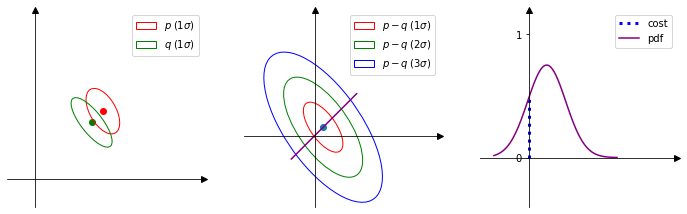

In [3]:
up = np.array([1.2, 1.2])
cp = np.array([[0.08956964, -0.0624375 ], [-0.0624375 , 0.16318393]])
uq = np.array([1, 1])
cq = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])
NDTFigures(up, cp, uq, cq)

0.000951048122358946


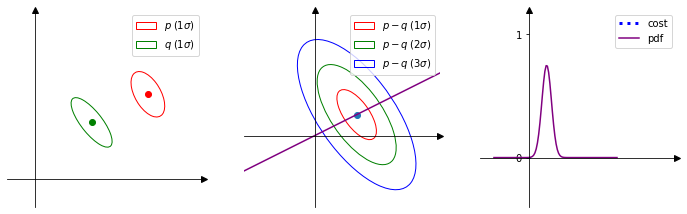

In [4]:
up = np.array([2, 1.5])
cp = np.array([[0.08956964, -0.0624375 ], [-0.0624375 , 0.16318393]])
uq = np.array([1, 1])
cq = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])
NDTFigures(up, cp, uq, cq)

## SNDT Figures

In [5]:
def SNDTFigures(up, cp, uq, cq):
    pn = -nm(cp)
    qn = -nm(cq)
    upq = up - uq
    cpq = cp + cq
    npq = (pn + qn) / np.linalg.norm(pn + qn)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(131)
    bookstyle(ax)
    ell(up, cp, ax, 1, edgecolor='r', label='$p\;(1\sigma)$')
    ell(uq, cq, ax, 1, edgecolor='g', label='$q\;(1\sigma)$')
    ax.annotate('', xy=up, xytext=up+pn, arrowprops=dict(edgecolor='r', arrowstyle="<-"))
    ax.annotate('', xy=uq, xytext=uq+qn, arrowprops=dict(edgecolor='g', arrowstyle="<-"))
    ax.scatter(*up, c='r')
    ax.scatter(*uq, c='g')
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect('equal')
    ax.legend(loc='upper right')

    ax = fig.add_subplot(232)
    bookstyle(ax)
    ell(upq, cpq, ax, 1, edgecolor='r', label='$p - q\;(1\sigma)$')
    ell(upq, cpq, ax, 2, edgecolor='g', label='$p - q\;(2\sigma)$')
    ell(upq, cpq, ax, 3, edgecolor='b', label='$p - q\;(3\sigma)$')
    ax.scatter(*upq)
    ax.set_xlim(-1.7, 4.5)
    ax.set_ylim(-1.7, 4.5)
    ax.set_aspect('equal')
    ax.legend()

    ax = fig.add_subplot(235)
    bookstyle(ax)
    ax.annotate('', xy=[0, 0], xytext=pn, arrowprops=dict(edgecolor='r', arrowstyle='<-'))
    ax.annotate('', xy=pn, xytext=pn+qn, arrowprops=dict(edgecolor='g', arrowstyle='<-'))
    ax.annotate('', xy=[0, 0], xytext=pn+qn, arrowprops=dict(edgecolor='b', arrowstyle='<-'))
    ax.annotate('', xy=npq, xytext=[0, 0], arrowprops=dict(facecolor='b', edgecolor='b', width=1.5, headlength=7, headwidth=7))
    ax.annotate('$n_p$', [0.5, 0.2], size=12)
    ax.annotate('$n_q$', [1.3, 0.7], size=12)
    ax.annotate(r'$\frac{n_p+n_q}{\|n_p+n_q\|}$', [0.1, 0.5], size=16)
    x = np.linspace(0, 1, 100)
    y = np.sqrt(1 - x ** 2)
    ax.plot(x, y, 'k')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlim(-0.3, 1.8)
    ax.set_ylim(-0.3, 1.3)
    ax.set_aspect('equal')

    ax = fig.add_subplot(133)
    bookstyle(ax)
    xmin, xmax = -5 * upq, 5 * upq
    mu = upq.dot(npq)
    sig = sqrt(npq.dot(cpq.dot(npq)))
    x = np.linspace(mu-3*sig-0.3, mu+3*sig+0.3, 100)
    y = scipy.stats.norm(mu, sig).pdf(x)
    ax.plot(x, y, c='purple', label='pdf')
    ax.plot([0, 0], [0, scipy.stats.norm(mu, sig).pdf(0)], 'b:', lw=3, label='cost')
    ax.set_xlim(mu-3*sig-0.3, mu+3*sig+0.3)
    ax.set_ylim(-0.3, 1.5)
    ax.set_yticks([0, 1])
    ax.set_aspect('equal')
    ax.legend(loc='upper right')
    print(scipy.stats.norm(upq.dot(npq), sqrt(npq.dot(cpq.dot(npq)))).pdf(0))

0.8651976859908911


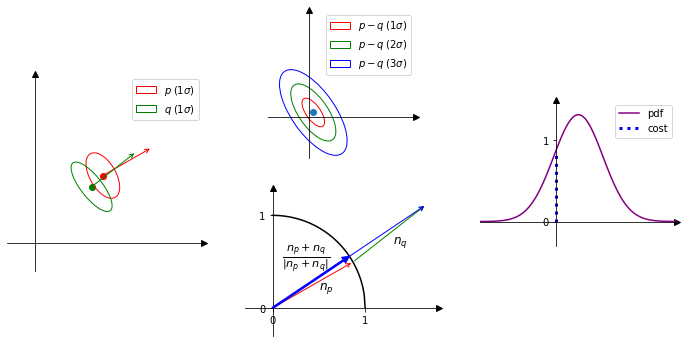

In [6]:
up = np.array([1.2, 1.2])
cp = np.array([[0.08956964, -0.0624375 ], [-0.0624375 , 0.16318393]])
uq = np.array([1, 1])
cq = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])
SNDTFigures(up, cp, uq, cq)

0.0016667015511417544


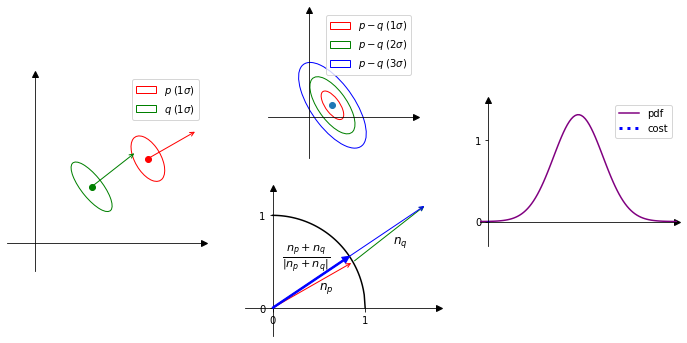

In [7]:
up = np.array([2, 1.5])
cp = np.array([[0.08956964, -0.0624375 ], [-0.0624375 , 0.16318393]])
uq = np.array([1, 1])
cq = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])
SNDTFigures(up, cp, uq, cq)

## Comparison: NDT vs. SNDT

In [8]:
def NDTSNDT(up, cp, uq, cq, th, ax=None):
    cp = rotcov(cp, th)
#     cq = rotcov(cq, -th / 2.)
    pn, qn = nm(cp), nm(cq)
    if (qn[0] < 0):
        qn = -qn
    if (pn.dot(qn) < 0):
        pn = -pn
    upq = up - uq
    cpq = cp + cq
    npq = (pn + qn) / np.linalg.norm(pn + qn)

    ndt = -exp(-0.1 * upq.dot(np.linalg.inv(cpq)).dot(upq))
    sndt = -exp(-0.1 * upq.dot(npq) * upq.dot(npq) / npq.dot(cpq.dot(npq)))
    if (ax):
        bookstyle(ax)
        ell(up, cp, ax, 1, edgecolor='r', label='$p\;(1\sigma)$')
        ell(uq, cq, ax, 1, edgecolor='g', label='$q\;(1\sigma)$')
        ax.annotate('', xy=up, xytext=up+pn, arrowprops=dict(edgecolor='r', arrowstyle="<-"))
        ax.annotate('', xy=uq, xytext=uq+qn, arrowprops=dict(edgecolor='g', arrowstyle="<-"))
        ax.scatter(*up, c='r')
        ax.scatter(*uq, c='g')
        ax.set_xlim(-0.5, 3)
        ax.set_ylim(-0.5, 3)
        ax.set_aspect('equal')
        ax.legend(loc='upper right')
    return ndt, sndt

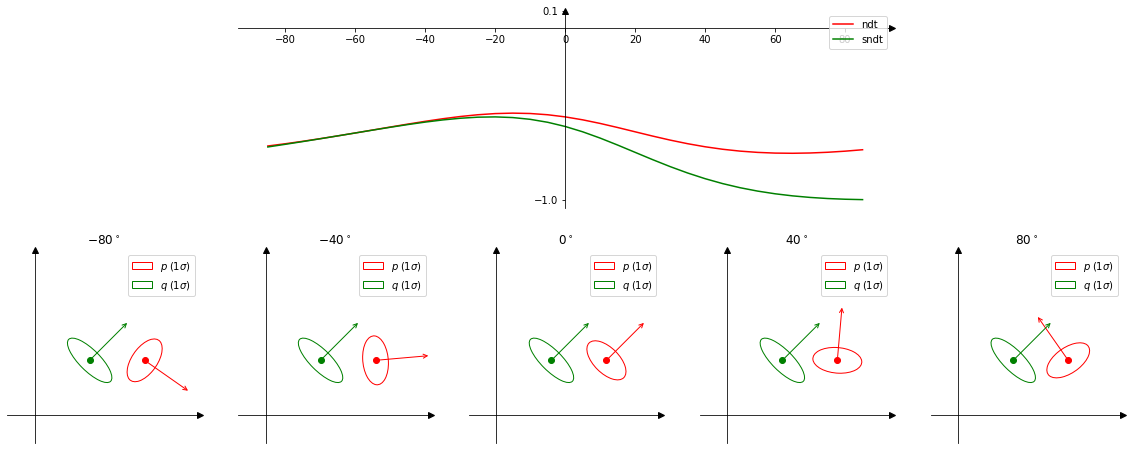

In [9]:
up = np.array([2, 1])
uq = np.array([1, 1])
cp = np.array([[0.12637678, -0.07247901], [-0.07247901, 0.12637678]])
cq = np.array([[0.16331697, -0.12715062], [-0.12715062, 0.16331697]])

ths = range(-85, 90, 5)
ndts, sndts = [], []
for th in ths:
    ndt, sndt = NDTSNDT(up, cp, uq, cq, th)
    ndts.append(ndt)
    sndts.append(sndt)
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(2, 5, (2, 4))
bookstyle(ax)
ax.plot(ths, ndts, 'r', label='ndt')
ax.plot(ths, sndts, 'g', label='sndt')
ax.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax.set_yticks([-1, 0.1])
ax.legend()

for i in range(5):
    ax = fig.add_subplot(2, 5, i + 6)
    ang = -80 + 40 * i
    NDTSNDT(up, cp, uq, cq, ang, ax)
    ax.set_title(r'${}^\circ$'.format(ang))

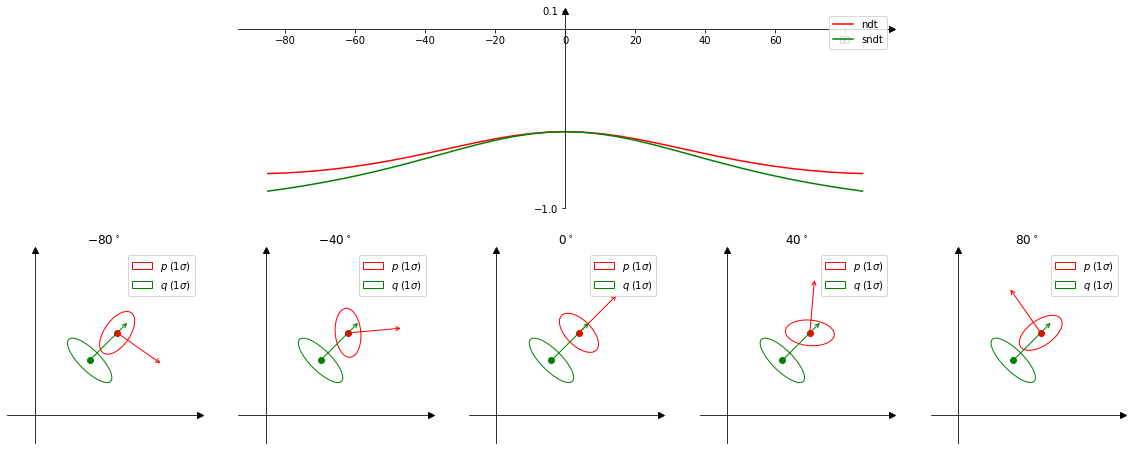

In [10]:
up = np.array([1.5, 1.5])
uq = np.array([1, 1])
cp = np.array([[0.12637678, -0.07247901], [-0.07247901, 0.12637678]])
cq = np.array([[0.16331697, -0.12715062], [-0.12715062, 0.16331697]])

ths = range(-85, 90, 5)
ndts, sndts = [], []
for th in ths:
    ndt, sndt = NDTSNDT(up, cp, uq, cq, th)
    ndts.append(ndt)
    sndts.append(sndt)
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(2, 5, (2, 4))
bookstyle(ax)
ax.plot(ths, ndts, 'r', label='ndt')
ax.plot(ths, sndts, 'g', label='sndt')
ax.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax.set_yticks([-1, 0.1])
ax.legend()

for i in range(5):
    ax = fig.add_subplot(2, 5, i + 6)
    ang = -80 + 40 * i
    NDTSNDT(up, cp, uq, cq, ang, ax)
    ax.set_title(r'${}^\circ$'.format(ang))

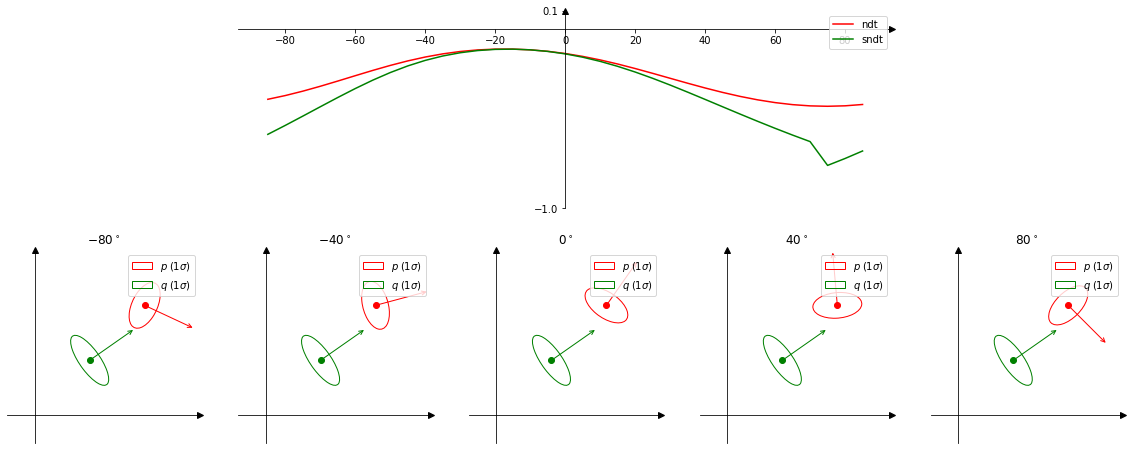

In [11]:
up = np.array([2, 2])
uq = np.array([1, 1])
cp = np.array([[0.12637678, -0.07247901], [-0.07247901, 0.12637678]])
cq = np.array([[0.16331697, -0.12715062], [-0.12715062, 0.16331697]])
cp = rotcov(cp, 10)
cq = rotcov(cq, -10)

ths = range(-85, 90, 5)
ndts, sndts = [], []
for th in ths:
    ndt, sndt = NDTSNDT(up, cp, uq, cq, th)
    ndts.append(ndt)
    sndts.append(sndt)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(2, 5, (2, 4))
bookstyle(ax)
ax.plot(ths, ndts, 'r', label='ndt')
ax.plot(ths, sndts, 'g', label='sndt')
ax.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax.set_yticks([-1, 0.1])
ax.legend()

for i in range(5):
    ax = fig.add_subplot(2, 5, i + 6)
    ang = -80 + 40 * i
    NDTSNDT(up, cp, uq, cq, ang, ax)
    ax.set_title(r'${}^\circ$'.format(ang))

## Comparison: ICP vs. SICP

In [12]:
def ICPSICP(p, pn, q, qn, th, ax=None):
    th = np.deg2rad(th)
    R = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
    pn = R.dot(pn)
    if (pn.dot(qn) < 0):
        pn = -pn
    pq = p - q
    npq = (pn + qn) / np.linalg.norm(pn + qn)

    icp = np.linalg.norm(pq)
    sicp = abs(pq.dot(npq))

    if (ax):
        bookstyle(ax)
        ax.scatter(*p, c='r', label='p')
        ax.scatter(*q, c='g', label='q')
        ax.annotate('', xy=p, xytext=p+pn, arrowprops=dict(edgecolor='r', arrowstyle="<-"))
        ax.annotate('', xy=q, xytext=q+qn, arrowprops=dict(edgecolor='g', arrowstyle="<-"))
        ax.set_xlim(-0.5, 3)
        ax.set_ylim(-0.5, 3)
        ax.set_aspect('equal')
        ax.legend(loc='upper right')
    return icp, sicp

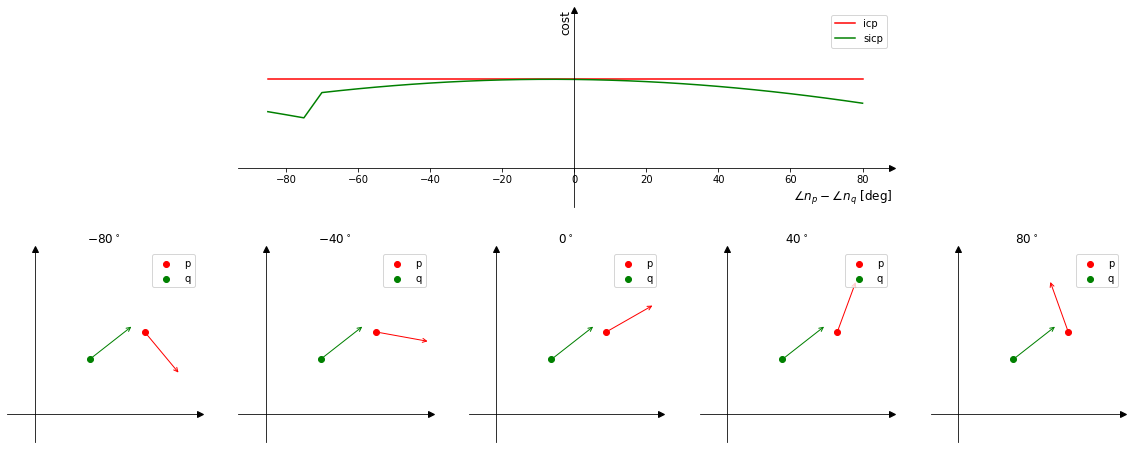

In [13]:
p = np.array([2, 1.5])
q = np.array([1, 1])
pn = np.array([0.8682833,  0.49606866])
qn = np.array([0.78720661, 0.61668935])

ths = np.arange(-85, 85, 5)
icps, sicps = [], []
for th in ths:
    icp, sicp = ICPSICP(p, pn, q, qn, th - 8.3345)
    icps.append(icp)
    sicps.append(sicp)
    

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(2, 5, (2, 4))
bookstyle(ax)
ax.plot(ths, icps, 'r', label='icp')
ax.plot(ths, sicps, 'g', label='sicp')
ax.set_xlabel(r'$\angle n_p-\angle n_q$ [deg]', loc='right', size=12)
ax.set_ylabel('cost', labelpad=2, loc='top', size=12)
ax.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax.set_ylim(-0.5, 2)
ax.legend()

for i in range(5):
    ax = fig.add_subplot(2, 5, i + 6)
    ang = -80 + 40 * i
    ICPSICP(p, pn, q, qn, ang, ax)
    ax.set_title(r'${}^\circ$'.format(ang))

In [14]:
cp = np.array([[0.08956964, -0.0624375 ], [-0.0624375 , 0.16318393]])
cq = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])

In [15]:
np.arccos(nm(cp).dot(nm(cq)))

0.14546499596619575

In [16]:
th = 0.14546499596619575
R = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
nm(R.dot(cp).dot(R.T)), nm(cq)

(array([-0.78720661, -0.61668935]), array([-0.78720661, -0.61668935]))

In [17]:
R.dot(cp).dot(R.T)

array([[ 0.10902614, -0.0703716 ],
       [-0.0703716 ,  0.14372743]])

In [18]:
print(nm(cp))

[-0.8682833  -0.49606866]


In [19]:
# cp = np.array([[0.10902614, -0.0703716], [-0.0703716 ,  0.14372743]])
cp = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])
print(np.arccos(-nm(cp).dot(np.array([sqrt(2)/2, sqrt(2)/2]))))
th = 0.12086801884481405
R = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
R.dot(cp).dot(R.T)

0.12086799120351507


array([[ 0.16331697, -0.12715062],
       [-0.12715062,  0.16331696]])

In [20]:
nm(cp)

array([-0.78720661, -0.61668935])

In [21]:
np.array([sqrt(2)/2, sqrt(2)/2])

array([0.70710678, 0.70710678])

In [22]:
-nm(cp)

array([0.78720661, 0.61668935])

In [23]:
import sympy as sym
nx, ny = sym.symbols('n_x, n_y')
a, b, c = sym.symbols('a, b, c')
n = sym.Matrix([[nx], [ny]])
S = sym.Matrix([[a, b], [b, c]])
Id = ((n * n.T * S) / (n.T * S * n)[0])

In [24]:
Id

Matrix([
[(a*n_x**2 + b*n_x*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y)), (b*n_x**2 + c*n_x*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y))],
[(a*n_x*n_y + b*n_y**2)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y)), (b*n_x*n_y + c*n_y**2)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y))]])

In [25]:
Id2 = ((S * n * n.T) / (n.T * S * n)[0])

In [26]:
Id2

Matrix([
[n_x*(a*n_x + b*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y)), n_y*(a*n_x + b*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y))],
[n_x*(b*n_x + c*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y)), n_y*(b*n_x + c*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y))]])

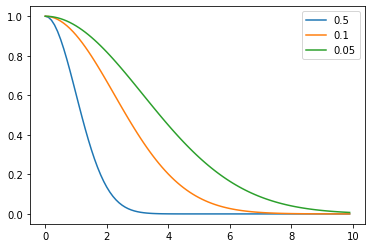

In [27]:
x = np.arange(0, 10, 0.1)
plt.plot(x, np.exp(-0.5 * x ** 2), label='0.5')
plt.plot(x, np.exp(-0.1 * x ** 2), label='0.1')
plt.plot(x, np.exp(-0.05 * x ** 2), label='0.05')
plt.legend()

In [28]:
# up = np.array([2, 2])
# uq = np.array([1, 1])
# cp = np.array([[0.12637678, -0.07247901], [-0.07247901, 0.12637678]])
# cq = np.array([[0.16331697, -0.12715062], [-0.12715062, 0.16331697]])
up = np.array([10.35, -28.8739])
uq = np.array([11.384, -28.5082])
cp = np.array([[0.118188, 0.115773], [0.115773, 0.118036]])
cq = np.array([[0.221803, 0.115818], [0.115818, 0.168309]])
upq = up - uq
cpq = cp + cq
print(upq.dot(np.linalg.inv(cpq)).dot(upq))

4.03638082158281


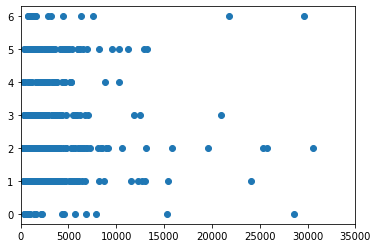

In [29]:
x = np.array([3.000000, 2.000000, 2.000000, 1.000000, 3.000000, 3.000000, 3.000000, 2.000000, 1.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 2.000000, 2.000000, 5.000000, 0.000000, 3.000000, 5.000000, 3.000000, 2.000000, 5.000000, 5.000000, 4.000000, 5.000000, 4.000000, 3.000000, 4.000000, 3.000000, 3.000000, 1.000000, 1.000000, 2.000000, 5.000000, 3.000000, 3.000000, 5.000000, 3.000000, 6.000000, 3.000000, 5.000000, 6.000000, 6.000000, 3.000000, 3.000000, 2.000000, 5.000000, 1.000000, 2.000000, 0.000000, 5.000000, 5.000000, 3.000000, 0.000000, 6.000000, 5.000000, 1.000000, 5.000000, 6.000000, 5.000000, 5.000000, 4.000000, 6.000000, 5.000000, 0.000000, 5.000000, 0.000000, 0.000000, 3.000000, 5.000000, 5.000000, 2.000000, 1.000000, 2.000000, 2.000000, 3.000000, 2.000000, 2.000000, 3.000000, 4.000000, 2.000000, 3.000000, 5.000000, 3.000000, 4.000000, 2.000000, 3.000000, 5.000000, 5.000000, 2.000000, 5.000000, 3.000000, 5.000000, 6.000000, 2.000000, 2.000000, 2.000000, 2.000000, 3.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 5.000000, 2.000000, 5.000000, 3.000000, 3.000000, 2.000000, 2.000000, 3.000000, 2.000000, 2.000000, 3.000000, 2.000000, 2.000000, 2.000000, 2.000000, 0.000000, 2.000000, 2.000000, 2.000000, 2.000000, 3.000000, 2.000000, 3.000000, 2.000000, 3.000000, 2.000000, 2.000000, 3.000000, 2.000000, 2.000000, 3.000000, 2.000000, 2.000000, 4.000000, 0.000000, 3.000000, 3.000000, 0.000000, 6.000000, 5.000000, 5.000000, 0.000000, 5.000000, 3.000000, 3.000000, 2.000000, 2.000000, 2.000000, 2.000000, 1.000000, 2.000000, 1.000000, 3.000000, 4.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 0.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 3.000000, 1.000000, 1.000000, 2.000000, 1.000000, 2.000000, 3.000000, 3.000000, 5.000000, 1.000000, 2.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 2.000000, 4.000000, 1.000000, 3.000000, 2.000000, 5.000000, 2.000000, 1.000000, 3.000000, 5.000000, 2.000000, 5.000000, 3.000000, 5.000000, 5.000000, 0.000000, 6.000000, 5.000000, 5.000000, 3.000000, 0.000000, 6.000000, 3.000000, 3.000000, 2.000000, 1.000000, 1.000000, 2.000000, 1.000000, 1.000000, 2.000000, 1.000000, 1.000000, 1.000000, 1.000000, 3.000000, 3.000000, 2.000000, 2.000000, 6.000000, 1.000000, 1.000000, 1.000000, 2.000000, 1.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 2.000000, 5.000000, 1.000000, 1.000000, 2.000000, 1.000000, 1.000000, 1.000000, 2.000000, 2.000000, 1.000000, 1.000000, 1.000000, 2.000000, 2.000000, 2.000000, 3.000000, 5.000000, 5.000000, 4.000000, 1.000000, 2.000000, 2.000000, 3.000000, 1.000000, 2.000000, 3.000000, 6.000000, 4.000000, 3.000000, 1.000000, 2.000000, 4.000000, 5.000000, 2.000000, 2.000000, 1.000000, 3.000000, 3.000000, 2.000000, 3.000000, 1.000000, 2.000000, 2.000000, 2.000000, 1.000000, 5.000000, 2.000000, 3.000000, 2.000000, 2.000000, 1.000000, 2.000000, 1.000000, 1.000000, 1.000000, 4.000000, 3.000000, 1.000000, 2.000000, 1.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 5.000000, 5.000000, 3.000000, 0.000000, 1.000000, 3.000000, 2.000000, 5.000000, 1.000000, 5.000000, 5.000000, 2.000000, 3.000000, 5.000000, 2.000000, 3.000000, 2.000000, 2.000000, 2.000000, 1.000000, 4.000000, 2.000000, 1.000000, 2.000000, 3.000000, 1.000000, 1.000000, 2.000000, 1.000000, 1.000000, 1.000000, 4.000000, 2.000000, 2.000000, 1.000000, 1.000000, 1.000000, 4.000000, 2.000000, 4.000000, 1.000000, 2.000000, 1.000000, 1.000000, 1.000000, 2.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 2.000000, 2.000000, 1.000000, 2.000000, 2.000000, 2.000000, 2.000000, 4.000000, 2.000000, 1.000000, 2.000000, 2.000000, 2.000000, 2.000000, 4.000000, 3.000000, 2.000000, 5.000000, 2.000000, 2.000000, 2.000000, 2.000000, 3.000000, 2.000000, 3.000000, 2.000000, 5.000000, 1.000000, 2.000000, 2.000000, 2.000000, 0.000000, 2.000000, 2.000000, 2.000000, 6.000000, 2.000000, 1.000000, 5.000000, 2.000000, 1.000000, 2.000000, 2.000000, 2.000000, 5.000000, 2.000000, 2.000000, 3.000000, 3.000000, 2.000000, 3.000000, 2.000000, 2.000000, 4.000000, 2.000000, 2.000000, 5.000000, 3.000000, 2.000000, 2.000000, 1.000000, 1.000000, 2.000000, 2.000000, 2.000000, 1.000000, 1.000000, 2.000000, 2.000000, 2.000000, 1.000000, 2.000000, 1.000000, 4.000000, 1.000000, 2.000000, 3.000000, 6.000000, 5.000000, 5.000000, 6.000000, 5.000000, 5.000000, 5.000000, 3.000000, 4.000000, 4.000000, 3.000000, 3.000000, 4.000000, 4.000000, 1.000000, 5.000000, 1.000000, 2.000000, 4.000000, 2.000000, 2.000000, 1.000000, 1.000000, 3.000000, 1.000000, 1.000000, 1.000000, 2.000000, 4.000000, 3.000000, 2.000000, 5.000000, 1.000000, 1.000000, 2.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 3.000000, 1.000000, 1.000000, 1.000000, 3.000000, 3.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 1.000000, 1.000000, 2.000000, 1.000000, 1.000000, 5.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 3.000000, 1.000000, 3.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 3.000000, 2.000000, 2.000000, 1.000000, 3.000000, 2.000000, 2.000000, 2.000000, 2.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 2.000000, 1.000000, 2.000000, 2.000000, 3.000000, 2.000000, 4.000000, 4.000000, 4.000000, 5.000000, 5.000000, 5.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 5.000000, 2.000000, 1.000000, 2.000000, 2.000000, 2.000000, 5.000000, 2.000000, 1.000000, 2.000000, 3.000000, 2.000000, 1.000000, 1.000000, 1.000000, 2.000000, 2.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 5.000000, 1.000000, 1.000000, 1.000000, 0.000000, 2.000000, 4.000000, 1.000000, 2.000000, ])
y = np.array([3807.985962, 4011.142877, 781.702591, 773.021846, 3462.694679, 1859.237379, 1150.278229, 2810.646353, 5062.529203, 1993.061335, 2366.852325, 5998.296773, 891.352827, 2398.669372, 923.510962, 413.883319, 2483.808151, 1649.936018, 11507.817630, 408.166461, 1515.683900, 1966.508702, 973.721229, 1580.932133, 983.814048, 1622.206767, 1443.033278, 1034.959995, 1589.810068, 2234.530627, 12932.946987, 1036.913801, 3717.433018, 1943.143738, 2832.647609, 1524.239512, 10257.158609, 1319.997263, 3635.814010, 729.111869, 2676.533311, 3634.082508, 4128.761615, 1387.874640, 6783.009501, 1621.014591, 2594.680336, 21755.137699, 1500.661371, 2145.893463, 977.751332, 1439.123094, 2076.805848, 1995.917737, 1574.498931, 1406.350239, 1459.837451, 1673.835970, 28591.254946, 1450.805758, 1458.881601, 2809.723916, 15259.352298, 3184.596855, 1016.316964, 3607.332921, 4939.264961, 1183.433012, 1669.027249, 3153.188046, 449.039654, 1137.639631, 1683.137490, 6787.677828, 4689.784673, 4284.311288, 2149.185237, 1504.428307, 1212.509567, 2588.436325, 1044.619736, 24068.557569, 1990.498349, 1258.857327, 3289.997689, 405.346276, 692.250707, 946.113687, 3234.807029, 830.470789, 1178.137124, 5953.218941, 1099.443927, 1145.844496, 376.653821, 709.301522, 1014.679079, 392.521818, 222.792219, 1828.114681, 507.832937, 3352.604362, 800.768352, 466.892241, 2567.456354, 1326.161326, 890.881127, 1103.157596, 1574.719412, 429.030379, 839.144345, 603.854856, 1096.141952, 1026.352125, 745.293843, 572.001357, 1047.103737, 728.120418, 375.814544, 8371.119501, 1888.601286, 324.013200, 606.624086, 1124.439546, 1453.837786, 5506.963105, 243.642081, 741.816017, 349.669325, 894.850364, 443.766508, 603.250878, 478.252846, 847.504499, 954.436471, 3222.051074, 11868.163448, 789.298381, 1798.596362, 457.430416, 556.646733, 1147.547229, 487.676706, 430.052276, 619.201890, 3497.775181, 1253.343211, 2954.536985, 327.742071, 1208.945159, 4278.241866, 5709.745833, 29634.472187, 820.240798, 2843.232843, 560.727681, 5968.116322, 3368.173010, 624.458853, 712.655544, 631.731492, 759.668798, 330.484094, 788.529940, 688.283417, 581.769754, 817.787541, 821.428288, 1890.566205, 799.966413, 1364.803811, 430.583088, 591.078056, 986.785649, 808.842749, 1162.004089, 4795.575039, 835.454079, 2607.167385, 584.398522, 1360.855078, 1883.979473, 2382.901090, 617.963087, 486.884562, 735.083210, 2832.659884, 1533.779528, 1699.327426, 1033.073634, 882.862654, 1138.226079, 840.042566, 3173.102198, 1873.721966, 976.874856, 2217.810748, 465.483171, 1301.740816, 2441.491340, 2609.976213, 313.433777, 1800.011646, 616.192424, 2124.764718, 782.894443, 847.191299, 1294.925557, 2677.724560, 1837.040653, 3273.625001, 2474.049207, 1380.806626, 1699.948852, 4506.936611, 2824.226985, 2095.656189, 1418.303009, 1642.938482, 720.275250, 4412.360192, 1259.614453, 5673.661822, 690.842060, 363.301995, 364.750089, 1295.203635, 684.190703, 644.540836, 440.409791, 800.848845, 2405.265236, 1289.321046, 1010.395476, 1887.976036, 874.561704, 852.089021, 765.623978, 7528.982069, 2308.113550, 1601.631390, 4048.291623, 844.846548, 819.937518, 1585.471627, 5302.503686, 1112.746148, 1235.212513, 3677.641555, 730.563986, 1337.544046, 576.339039, 5851.162427, 1414.803964, 481.309088, 698.532253, 381.464340, 2790.012996, 8712.941742, 854.355687, 1137.108590, 640.770002, 548.304861, 501.539939, 25299.325634, 834.466851, 1846.105240, 56652.381055, 489.834008, 366.277811, 417.913670, 749.378722, 1054.037342, 2056.460436, 5958.946962, 841.396118, 877.450886, 413.022097, 1450.974065, 2237.407383, 495.800043, 4071.860187, 1979.690761, 1469.388962, 1662.020337, 1099.540353, 465.115728, 357.009067, 962.882595, 5423.701327, 419.646149, 1050.219983, 1162.653406, 689.596372, 879.383155, 1855.924917, 608.847971, 751.213990, 3876.423014, 1282.664414, 762.330589, 569.885771, 2416.857230, 680.498596, 1288.706945, 706.094808, 418.140026, 869.927788, 2460.426220, 1647.835263, 1016.475333, 449.226490, 272.146339, 725.562120, 2011.013684, 6480.869984, 419.158547, 1405.944367, 927.617709, 593.137035, 405.688598, 1736.752867, 1058.064815, 651.679673, 509.619510, 694.836337, 1551.070757, 607.632349, 890.164337, 692.509272, 853.591626, 1008.365613, 460.066012, 3319.173947, 1796.993486, 1900.258677, 1104.244561, 521.262899, 2617.543767, 643.971340, 1662.377427, 1970.199534, 1067.959403, 30583.792134, 2022.870873, 1096.600117, 3533.541142, 1071.435679, 609.398152, 1129.568075, 1179.209963, 1049.110506, 651.568840, 1157.366089, 1131.832456, 1054.434056, 6405.767584, 2238.089030, 2104.936597, 501.575548, 759.455014, 974.136416, 3067.773298, 1631.712429, 3754.444066, 4286.385950, 2953.021291, 3243.455006, 549.533253, 1596.357833, 1167.659628, 7217.901744, 5293.093068, 2350.861078, 754.989992, 2263.444583, 1262.877634, 1098.974133, 1186.643249, 5421.311464, 891.464941, 2386.116642, 449.428382, 916.639634, 959.180726, 2217.710809, 2338.650211, 1667.036408, 6886.753808, 3850.497033, 928.729937, 1578.676408, 404.615337, 1618.349736, 2524.513045, 1325.809980, 2736.820574, 402.844721, 534.089273, 1445.661608, 279.920500, 2068.405441, 574.906166, 1028.966580, 3637.738782, 547.770095, 880.015241, 4389.617997, 3046.851504, 546.831328, 13110.547576, 608.570694, 1058.084984, 6908.849996, 1421.748550, 1199.833092, 738.451689, 1718.824681, 504.292224, 537.654275, 2389.833338, 686.701486, 813.267854, 1786.813922, 4668.960953, 1400.706543, 2268.122064, 1024.624360, 6476.866126, 1234.087913, 786.517516, 4559.670756, 1370.216507, 830.148912, 4700.477486, 3587.783911, 3004.243400, 1390.009790, 10626.308572, 750.830628, 3350.867059, 3521.476454, 1702.172484, 5027.906567, 3638.618268, 1700.056975, 794.433559, 647.965501, 1538.956544, 8563.150091, 1645.910677, 1675.413037, 1157.156888, 3382.402090, 2515.759155, 6927.492394, 2074.096560, 2323.202474, 3472.988387, 1941.395714, 5306.263393, 835.693575, 6216.767096, 6253.847047, 6303.448524, 1397.586316, 4782.711412, 1647.139034, 4329.758122, 9531.502887, 2984.088302, 4036.090295, 2290.924284, 2359.944766, 7037.937520, 12455.668226, 5205.331910, 3611.423732, 205463.133786, 6201.956467, 4682.944855, 2550.903842, 3828.775582, 9110.691066, 2042.451938, 1522.779676, 15438.801709, 5829.719688, 13029.020874, 5248.180846, 1431.937802, 1389.525998, 5243.140111, 20984.795868, 1626.856497, 1520.132711, 1696.837363, 1661.721449, 1220.128231, 12261.543669, 4187.169911, 1350.285682, 8197.084736, 954.944762, 3769.357231, 2017.715110, 995.262883, 1871.347223, 2432.127268, 1869.295186, 2884.653608, 1334.334788, 624.781065, 6454.386751, 896.718289, 1214.412338, 2997.455530, 808.073248, 3657.466052, 1468.313182, 1177.580380, 6687.783955, 3118.576478, 1220.015419, 2974.414224, 1895.583721, 2180.006291, 6144.533935, 1011.351413, 5853.969724, 1490.389850, 3240.642366, 743.360103, 1761.185160, 2045.825644, 2076.947991, 8045.679508, 8953.749103, 2201.566270, 15797.597612, 864.199498, 1487.855037, 5499.403389, 19549.554462, 3839.368076, 1335.503442, 482.011266, 1267.302368, 1119.547800, 488.305637, 892.671974, 855.931738, 1616.200303, 12692.788831, 1369.459656, 2895.638291, 4788.657070, 1950.749956, 2024.514660, 4126.939380, 4615.075048, 8853.039932, 4560.057383, 11255.975635, 8163.678593, 10291.434022, 3614.333355, 4026.326796, 1909.591951, 1327.150441, 929.532747, 2997.739065, 637.669306, 984.019275, 3204.232034, 2141.783445, 5699.888506, 25757.315828, 2945.365161, 2839.692761, 6555.885741, 3027.023487, 1225.213800, 2530.216737, 1353.705156, 1458.975239, 1750.374330, 3717.501302, 625.602542, 1955.711491, 4366.414272, 1060.906819, 2315.217551, 4294.328334, 2369.420893, 3386.161491, 1541.700419, 987.909655, 783.318557, 1552.517224, 4638.945458, 5625.957801, 7914.727354, 1704.545247, 1091.645334, 5781.420217, 408.048150, 13196.180450, 669.498887, 1676.411552, 2625.174157, 1408.632846, 3979.626909, 1869.028185, 2212.162060, 384.156534, ])
plt.yticks([0, 1, 2, 3, 4, 5, 6])
plt.xlim(0, 35000)
plt.scatter(y, x)

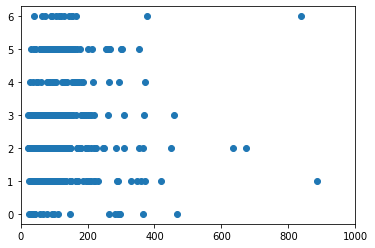

In [30]:
x = np.array([3, 2, 2, 1, 3, 3, 3, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 0, 3, 5, 3, 2, 5, 5, 4, 5, 4, 3, 4, 3, 3, 1, 1, 2, 5, 3, 3, 5, 3, 6, 3, 5, 6, 6, 3, 3, 2, 5, 1, 2, 0, 5, 5, 3, 0, 6, 5, 1, 5, 6, 5, 5, 4, 6, 5, 0, 5, 0, 0, 3, 5, 5, 2, 1, 2, 2, 3, 2, 2, 3, 4, 2, 3, 5, 3, 4, 2, 3, 5, 5, 2, 5, 3, 5, 6, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 5, 2, 5, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 4, 0, 3, 3, 0, 6, 5, 5, 0, 5, 3, 3, 2, 2, 2, 2, 1, 2, 1, 3, 4, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 2, 3, 3, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 3, 2, 5, 2, 1, 3, 5, 2, 5, 3, 5, 5, 0, 6, 5, 5, 3, 0, 6, 3, 3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 2, 6, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 3, 5, 5, 4, 1, 2, 2, 3, 1, 2, 3, 6, 4, 3, 1, 2, 4, 5, 2, 2, 1, 3, 3, 2, 3, 1, 2, 2, 2, 1, 5, 2, 3, 2, 2, 1, 2, 1, 1, 1, 4, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 3, 0, 1, 3, 2, 5, 1, 5, 5, 2, 3, 5, 2, 3, 2, 2, 2, 1, 4, 2, 1, 2, 3, 1, 1, 2, 1, 1, 1, 4, 2, 2, 1, 1, 1, 4, 2, 4, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 4, 2, 1, 2, 2, 2, 2, 4, 3, 2, 5, 2, 2, 2, 2, 3, 2, 3, 2, 5, 1, 2, 2, 2, 0, 2, 2, 2, 6, 2, 1, 5, 2, 1, 2, 2, 2, 5, 2, 2, 3, 3, 2, 3, 2, 2, 4, 2, 2, 5, 3, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 4, 1, 2, 3, 6, 5, 5, 6, 5, 5, 5, 3, 4, 4, 3, 3, 4, 4, 1, 5, 1, 2, 4, 2, 2, 1, 1, 3, 1, 1, 1, 2, 4, 3, 2, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 3, 2, 4, 4, 4, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 1, 2, 2, 2, 5, 2, 1, 2, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 5, 1, 1, 1, 0, 2, 4, 1, 2, ])
y = np.array([142.772568, 148.497818, 54.277140, 41.443171, 109.983542, 88.787255, 63.799018, 135.992309, 111.883105, 87.200979, 89.585151, 195.154233, 54.122956, 122.500939, 51.187180, 33.565387, 86.304330, 88.653348, 200.644038, 41.019246, 91.752805, 98.465223, 67.394303, 68.887249, 74.701269, 95.072818, 68.197842, 92.073129, 100.694675, 136.862556, 267.954302, 99.147975, 171.665971, 158.748286, 158.553405, 138.059327, 295.195822, 120.086127, 135.627166, 61.708392, 127.156518, 115.809285, 139.610395, 114.414384, 184.342892, 125.795293, 166.908569, 377.381966, 133.064133, 131.302547, 106.111338, 121.365331, 117.813207, 124.893008, 76.289865, 95.517827, 76.381466, 92.322339, 467.402947, 80.851209, 76.324149, 137.982878, 281.576257, 130.753872, 80.801803, 129.278157, 145.503940, 92.192290, 119.810850, 94.163439, 37.904642, 94.201460, 143.866156, 297.421894, 263.963239, 290.155195, 147.422223, 127.864047, 107.319105, 167.737397, 61.054959, 419.541247, 70.891321, 41.493400, 112.364956, 35.831771, 41.368851, 57.082330, 97.519416, 48.963787, 51.023546, 115.138510, 56.646315, 50.051710, 32.691750, 41.624381, 42.307115, 29.996170, 22.498352, 57.561264, 34.635069, 70.911846, 38.746854, 33.203674, 85.575456, 81.875996, 44.163305, 68.078571, 74.999447, 37.445855, 53.007988, 37.182765, 44.999769, 45.271093, 43.774794, 35.192650, 42.917138, 34.502166, 28.572909, 171.160731, 53.981960, 23.440637, 36.476894, 59.919964, 70.687096, 147.874856, 25.902430, 41.599150, 25.238275, 34.674628, 34.597662, 38.581306, 33.791986, 47.911683, 49.103888, 66.798587, 195.115917, 49.154169, 63.043046, 29.497155, 45.865101, 47.310442, 37.864323, 35.091030, 37.958686, 125.320012, 48.581285, 82.102427, 25.729288, 68.872485, 219.089784, 365.086088, 838.651279, 63.541267, 111.654035, 30.824318, 157.720036, 101.907091, 32.027618, 45.096975, 36.536671, 45.688617, 27.867245, 34.986522, 35.315035, 32.194831, 45.897987, 49.711369, 61.739577, 53.046330, 75.116634, 31.830708, 45.025697, 68.228172, 47.295240, 83.414655, 136.974059, 52.728928, 99.476278, 55.599665, 97.496404, 109.986416, 93.814019, 47.093017, 41.706212, 59.852013, 114.443357, 67.528006, 78.743213, 63.795172, 53.368815, 70.339195, 47.294847, 104.769226, 75.940044, 49.100793, 83.360467, 34.416345, 60.282822, 84.321169, 128.957867, 25.890414, 68.055893, 51.642051, 83.137921, 51.155667, 53.426369, 69.328290, 118.853634, 91.928266, 115.929884, 138.136241, 126.331936, 138.056010, 263.909670, 166.183833, 176.925823, 156.035250, 152.389769, 80.211875, 144.157577, 92.894781, 146.732317, 56.489954, 36.413210, 36.321515, 76.802868, 50.376137, 46.703310, 37.907818, 58.134484, 87.216284, 72.250323, 71.430654, 105.290271, 60.014742, 54.786183, 58.101376, 154.518533, 78.968017, 76.792799, 127.393777, 59.036344, 60.749911, 93.815357, 127.773869, 78.310328, 83.864828, 121.279487, 57.910794, 90.747132, 46.980325, 147.227822, 74.059500, 39.976593, 54.321154, 33.900831, 89.821928, 196.641314, 53.841677, 63.132839, 45.056842, 46.578973, 48.794336, 449.574040, 57.491673, 99.085493, 885.568624, 44.491148, 34.058799, 36.856334, 55.612019, 61.050352, 66.569200, 200.248552, 49.196011, 56.820350, 33.072284, 74.854073, 113.143241, 38.243105, 121.068353, 97.373142, 73.803158, 78.776872, 62.191244, 33.440808, 29.802673, 60.732828, 142.030860, 32.451909, 61.903012, 48.980286, 40.821507, 56.479275, 82.344848, 43.243065, 49.327988, 114.726123, 54.651372, 43.903642, 41.628284, 108.564552, 48.136005, 78.677794, 56.708466, 37.939027, 52.026617, 70.410711, 63.567692, 46.825858, 31.259323, 27.841193, 46.773027, 84.087452, 132.752747, 32.658900, 58.319350, 65.850306, 41.095107, 34.113542, 74.040605, 64.229326, 42.172921, 39.809852, 53.701663, 65.618456, 39.837469, 54.307007, 40.539542, 48.950827, 43.496526, 38.866178, 102.026378, 65.218568, 69.137851, 58.393997, 51.382615, 109.101533, 60.413032, 123.488042, 186.612978, 79.250010, 1097.671060, 119.473806, 63.363497, 134.100612, 61.506466, 57.440957, 79.837824, 92.115531, 73.692929, 57.121390, 65.171540, 82.273875, 61.988206, 291.570744, 105.172430, 119.893431, 51.438801, 62.300739, 61.596440, 122.074715, 84.011125, 124.234430, 165.917397, 116.280690, 114.863899, 52.331478, 61.713569, 65.671668, 145.349294, 211.287957, 103.269481, 56.174107, 96.596756, 73.117283, 63.146857, 54.017530, 119.271037, 68.683455, 74.793059, 43.065643, 49.858124, 58.000939, 110.374895, 92.931055, 79.436790, 211.449019, 99.566115, 52.629625, 85.339533, 31.739867, 77.973014, 138.661510, 62.394908, 78.570484, 32.948942, 36.341038, 50.704010, 26.531121, 88.076272, 39.752221, 69.496809, 105.064501, 44.926583, 59.452129, 132.935696, 94.948008, 41.001288, 284.568947, 44.680921, 63.295235, 141.558275, 70.299008, 64.306102, 50.932148, 70.930554, 39.766319, 43.711855, 88.101861, 46.743059, 63.537702, 93.623979, 134.685808, 61.813195, 77.887115, 51.089799, 144.878053, 74.027845, 53.641785, 120.979498, 78.216046, 58.918865, 151.708208, 111.771640, 103.211599, 81.467291, 354.143101, 49.445845, 101.197894, 102.278449, 88.246567, 158.519799, 151.675289, 86.090520, 54.617835, 51.006855, 75.476381, 221.174129, 80.654643, 94.479730, 67.137549, 150.935193, 111.084103, 219.035122, 99.852460, 117.077205, 199.910060, 98.795487, 161.133044, 41.011231, 180.290833, 211.586670, 153.825811, 87.927125, 154.136915, 114.912982, 213.071364, 254.013351, 159.039347, 179.333377, 154.493034, 165.250113, 307.702755, 369.268885, 187.701497, 125.008021, 6113.880875, 154.031430, 218.760726, 142.546170, 172.411479, 250.068790, 102.668350, 104.744247, 328.415389, 260.384828, 347.182043, 185.646953, 101.937807, 92.175614, 179.994725, 458.220641, 98.096858, 78.213694, 75.808101, 81.901586, 72.632500, 288.050984, 171.875135, 82.211130, 231.671228, 73.237568, 92.564012, 73.367916, 54.365882, 102.099896, 94.502377, 85.997746, 95.362618, 69.485691, 55.528485, 138.823563, 71.237756, 78.159156, 87.395871, 53.013338, 165.721476, 87.755082, 61.240565, 201.307648, 95.501604, 80.155346, 133.035459, 69.361460, 102.069380, 166.484117, 70.891168, 189.303495, 96.485477, 208.784507, 56.458901, 115.872049, 107.345723, 119.616953, 225.176555, 366.509380, 109.209298, 307.655415, 62.392079, 103.212744, 155.600551, 635.122163, 167.598017, 118.090569, 54.396396, 103.982095, 71.331259, 55.342941, 79.373313, 58.688468, 87.910974, 370.837887, 80.783641, 205.559285, 194.788909, 143.948235, 148.109274, 178.051679, 264.316080, 370.438390, 214.837511, 304.301182, 257.372752, 355.146452, 246.877484, 172.820831, 100.030268, 84.012130, 72.335140, 116.795600, 53.890486, 74.102127, 121.924840, 136.878782, 197.635837, 674.471239, 147.283524, 141.818503, 262.136953, 126.525757, 85.479222, 128.022064, 113.381866, 91.162297, 98.658939, 171.846148, 55.333218, 106.029933, 200.090772, 73.903192, 76.400063, 169.122533, 114.815035, 147.483861, 82.775929, 98.369762, 86.305041, 113.438496, 221.601217, 359.383314, 294.830594, 113.489568, 90.320940, 151.179432, 45.029265, 300.862892, 60.509956, 97.784400, 126.320551, 99.144299, 130.306264, 98.038270, 102.877602, 31.828267, ])
plt.yticks([0, 1, 2, 3, 4, 5, 6])
plt.xlim(0, 1000)
plt.scatter(y, x)

In [2]:
from matplotlib.ticker import FormatStrFormatter
def converge(x, y1, y3, y5, y7, r=-1):
    if (r != -1):
        x = x * r
    ms = 3
    fig, ax = plt.subplots()
    ax.loglog(x, y1, 'o-', label='ICP', markersize=ms)
    ax.loglog(x, y3, 'o-', label='symmetric ICP', markersize=ms)
    ax.loglog(x, y5, 'o-', label='NDT', markersize=ms)
    ax.loglog(x, y7, 'o-', label='symmetric NDT', markersize=ms)
    if (r == -1):
        ax.set_xlabel('Error before ICP/NDT iteration')
        ax.set_ylabel('Error after ICP/NDT iteration')
    else:
        ax.set_xlabel('Error before ICP/NDT iteration [m]')
        ax.set_ylabel('Error after ICP/NDT iteration [m]')
    ax.grid()
    ax.legend(loc='upper left')
    ax.set_xlim([x[0], x[-1]])
#     ax.set_ylim([0, 1])
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

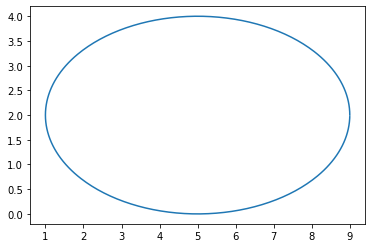

In [43]:
t = [np.deg2rad(i) for i in np.arange(0, 360)]
xx = 5 + 4 * np.cos(t)
yy = 2 + 2 * np.sin(t)
plt.plot(xx, yy)

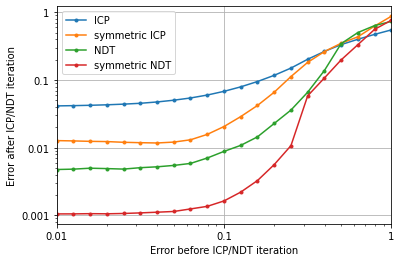

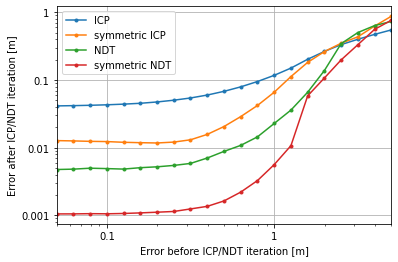

In [44]:
# rmax = 5
x = np.array([0.010000, 0.012589, 0.015849, 0.019953, 0.025119, 0.031623, 0.039811, 0.050119, 0.063096, 0.079433, 0.100000, 0.125893, 0.158489, 0.199526, 0.251189, 0.316228, 0.398107, 0.501187, 0.630957, 0.794328, 1.000000, ])
y1 = np.array([0.041432, 0.041806, 0.042310, 0.043019, 0.044001, 0.045295, 0.047384, 0.050311, 0.054270, 0.059949, 0.068022, 0.079240, 0.095015, 0.117292, 0.150069, 0.202668, 0.264594, 0.333797, 0.400253, 0.473016, 0.550517, ])
y3 = np.array([0.012718, 0.012590, 0.012401, 0.012305, 0.012011, 0.011850, 0.011731, 0.012090, 0.013075, 0.015706, 0.020524, 0.028788, 0.042021, 0.065981, 0.112407, 0.182345, 0.263353, 0.349893, 0.435357, 0.628052, 0.876519, ])
y5 = np.array([0.004755, 0.004815, 0.004972, 0.004907, 0.004823, 0.005060, 0.005212, 0.005465, 0.005849, 0.007030, 0.008808, 0.010813, 0.014440, 0.022784, 0.035929, 0.066033, 0.138268, 0.345255, 0.503316, 0.637743, 0.735285, ])
y7 = np.array([0.001049, 0.001050, 0.001058, 0.001053, 0.001065, 0.001086, 0.001112, 0.001140, 0.001243, 0.001357, 0.001631, 0.002203, 0.003262, 0.005614, 0.010708, 0.058374, 0.107276, 0.198458, 0.333131, 0.561119, 0.765985, ])
converge(x, y1, y3, y5, y7)
converge(x, y1, y3, y5, y7, 5)

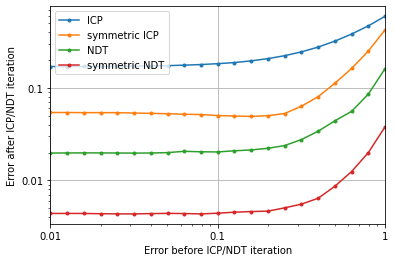

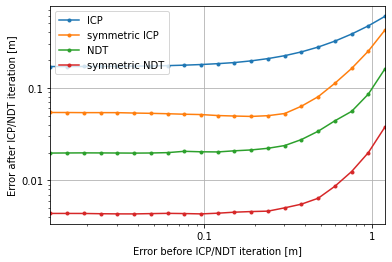

In [45]:
# rmax = 1.2
x = np.array([0.010000, 0.012589, 0.015849, 0.019953, 0.025119, 0.031623, 0.039811, 0.050119, 0.063096, 0.079433, 0.100000, 0.125893, 0.158489, 0.199526, 0.251189, 0.316228, 0.398107, 0.501187, 0.630957, 0.794328, 1.000000, ])
y1 = np.array([0.169925, 0.170035, 0.170137, 0.170439, 0.170815, 0.171563, 0.172429, 0.173783, 0.175760, 0.178568, 0.182459, 0.187550, 0.195630, 0.206967, 0.222495, 0.244551, 0.275660, 0.319580, 0.381195, 0.467461, 0.593096, ])
y3 = np.array([0.054215, 0.054172, 0.054013, 0.054022, 0.053981, 0.053475, 0.053087, 0.052571, 0.051915, 0.051495, 0.050252, 0.049642, 0.049144, 0.050075, 0.052834, 0.063362, 0.080283, 0.112122, 0.162126, 0.249906, 0.423126, ])
y5 = np.array([0.019770, 0.019818, 0.019864, 0.019840, 0.019802, 0.019749, 0.019807, 0.019984, 0.020651, 0.020407, 0.020332, 0.020913, 0.021373, 0.022264, 0.023826, 0.027662, 0.034020, 0.044106, 0.055762, 0.085764, 0.161499, ])
y7 = np.array([0.004408, 0.004409, 0.004405, 0.004377, 0.004360, 0.004356, 0.004389, 0.004417, 0.004395, 0.004358, 0.004434, 0.004548, 0.004619, 0.004667, 0.005066, 0.005553, 0.006431, 0.008664, 0.012498, 0.020022, 0.038052, ])
converge(x, y1, y3, y5, y7)
converge(x, y1, y3, y5, y7, 1.2)

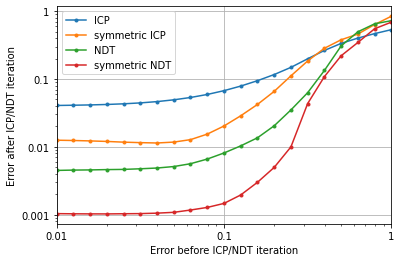

In [46]:
# r = 5, 500 trials
x = np.array([0.010000, 0.012589, 0.015849, 0.019953, 0.025119, 0.031623, 0.039811, 0.050119, 0.063096, 0.079433, 0.100000, 0.125893, 0.158489, 0.199526, 0.251189, 0.316228, 0.398107, 0.501187, 0.630957, 0.794328, 1.000000, ])
y1 = np.array([0.040743, 0.041082, 0.041512, 0.042153, 0.043105, 0.044458, 0.046466, 0.049361, 0.053422, 0.059202, 0.067336, 0.078681, 0.094475, 0.116423, 0.148546, 0.198779, 0.263825, 0.335085, 0.401214, 0.466949, 0.534037, ])
y3 = np.array([0.012533, 0.012412, 0.012237, 0.012021, 0.011734, 0.011544, 0.011403, 0.011754, 0.012776, 0.015407, 0.020294, 0.028710, 0.042174, 0.065765, 0.111355, 0.184521, 0.284112, 0.379020, 0.459769, 0.635751, 0.842144, ])
y5 = np.array([0.004495, 0.004545, 0.004573, 0.004622, 0.004653, 0.004752, 0.004876, 0.005127, 0.005642, 0.006607, 0.008120, 0.010343, 0.013598, 0.020446, 0.035004, 0.062921, 0.133750, 0.307700, 0.496928, 0.651420, 0.724570, ])
y7 = np.array([0.001037, 0.001031, 0.001028, 0.001027, 0.001033, 0.001038, 0.001054, 0.001084, 0.001172, 0.001280, 0.001467, 0.001954, 0.003002, 0.004981, 0.009994, 0.043519, 0.108566, 0.220241, 0.345839, 0.550878, 0.689291, ])
converge(x, y1, y3, y5, y7)

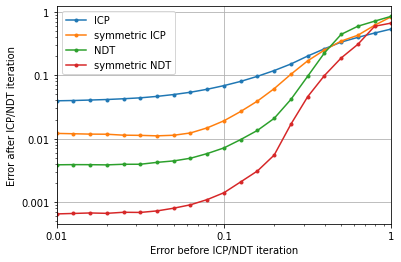

In [47]:
# r = 5, cs = 0.3
x = np.array([0.010000, 0.012589, 0.015849, 0.019953, 0.025119, 0.031623, 0.039811, 0.050119, 0.063096, 0.079433, 0.100000, 0.125893, 0.158489, 0.199526, 0.251189, 0.316228, 0.398107, 0.501187, 0.630957, 0.794328, 1.000000, ])
y1 = np.array([0.039504, 0.039921, 0.040604, 0.041391, 0.042557, 0.043996, 0.046364, 0.049598, 0.053911, 0.060075, 0.068528, 0.079934, 0.096085, 0.118334, 0.150271, 0.200435, 0.260613, 0.332274, 0.394948, 0.462017, 0.534752, ])
y3 = np.array([0.012104, 0.011954, 0.011796, 0.011747, 0.011351, 0.011275, 0.011079, 0.011317, 0.012305, 0.014804, 0.019132, 0.026836, 0.039122, 0.061377, 0.103553, 0.168510, 0.248738, 0.345088, 0.426381, 0.612716, 0.836088, ])
y5 = np.array([0.003873, 0.003899, 0.003891, 0.003863, 0.003950, 0.003951, 0.004232, 0.004461, 0.004918, 0.005823, 0.007154, 0.009687, 0.013496, 0.020896, 0.041586, 0.096219, 0.224101, 0.440114, 0.591503, 0.710625, 0.849244, ])
y7 = np.array([0.000652, 0.000663, 0.000675, 0.000666, 0.000692, 0.000688, 0.000727, 0.000803, 0.000908, 0.001097, 0.001407, 0.002086, 0.003098, 0.005516, 0.016938, 0.045845, 0.098611, 0.186800, 0.306887, 0.590901, 0.663276, ])
converge(x, y1, y3, y5, y7)

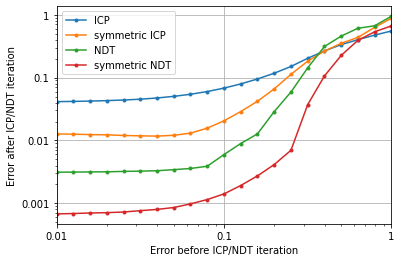

In [7]:
x = np.array([0.010000, 0.012589, 0.015849, 0.019953, 0.025119, 0.031623, 0.039811, 0.050119, 0.063096, 0.079433, 0.100000, 0.125893, 0.158489, 0.199526, 0.251189, 0.316228, 0.398107, 0.501187, 0.630957, 0.794328, 1.000000, ])
y1 = np.array([0.041432, 0.041806, 0.042310, 0.043019, 0.044001, 0.045295, 0.047384, 0.050311, 0.054270, 0.059949, 0.068022, 0.079240, 0.095015, 0.117292, 0.150069, 0.202668, 0.264594, 0.333797, 0.400253, 0.473016, 0.550517, ])
y3 = np.array([0.012718, 0.012590, 0.012401, 0.012305, 0.012011, 0.011850, 0.011731, 0.012090, 0.013075, 0.015706, 0.020524, 0.028788, 0.042021, 0.065981, 0.112407, 0.182345, 0.263353, 0.349893, 0.435357, 0.628052, 0.876519, ])
y5 = np.array([0.003133, 0.003143, 0.003163, 0.003175, 0.003222, 0.003257, 0.003303, 0.003438, 0.003589, 0.003893, 0.005973, 0.008943, 0.012739, 0.028774, 0.058838, 0.142520, 0.311948, 0.455725, 0.607944, 0.665401, 0.944242, ])
y7 = np.array([0.000680, 0.000690, 0.000703, 0.000712, 0.000729, 0.000766, 0.000802, 0.000859, 0.000982, 0.001150, 0.001415, 0.001923, 0.002735, 0.004138, 0.006976, 0.037063, 0.105831, 0.224793, 0.390876, 0.534408, 0.662758, ])
converge(x, y1, y3, y5, y7)

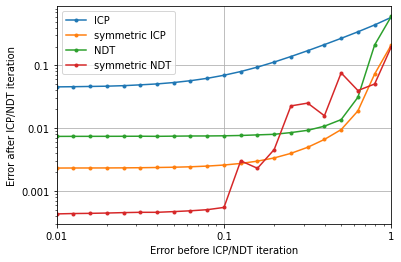

In [3]:
x = np.array([0.010000, 0.012589, 0.015849, 0.019953, 0.025119, 0.031623, 0.039811, 0.050119, 0.063096, 0.079433, 0.100000, 0.125893, 0.158489, 0.199526, 0.251189, 0.316228, 0.398107, 0.501187, 0.630957, 0.794328, 1.000000, ])
y1 = np.array([0.045437, 0.045741, 0.046171, 0.046618, 0.047515, 0.048969, 0.050664, 0.053305, 0.057034, 0.062229, 0.069652, 0.079831, 0.093950, 0.113078, 0.138605, 0.171632, 0.214592, 0.270225, 0.343268, 0.442081, 0.585127, ])
y3 = np.array([0.002307, 0.002311, 0.002313, 0.002316, 0.002323, 0.002335, 0.002354, 0.002377, 0.002416, 0.002479, 0.002577, 0.002732, 0.002972, 0.003344, 0.003958, 0.004944, 0.006595, 0.009465, 0.018778, 0.072837, 0.213607, ])
y5 = np.array([0.007377, 0.007388, 0.007391, 0.007399, 0.007406, 0.007421, 0.007395, 0.007440, 0.007484, 0.007495, 0.007539, 0.007629, 0.007799, 0.007962, 0.008485, 0.009220, 0.010726, 0.013656, 0.030986, 0.211741, 0.608181, ])
y7 = np.array([0.000428, 0.000434, 0.000437, 0.000442, 0.000449, 0.000454, 0.000454, 0.000466, 0.000480, 0.000500, 0.000543, 0.003009, 0.002286, 0.004553, 0.022606, 0.025038, 0.015753, 0.075947, 0.039736, 0.050509, 0.199381, ])
converge(x, y1, y3, y5, y7)

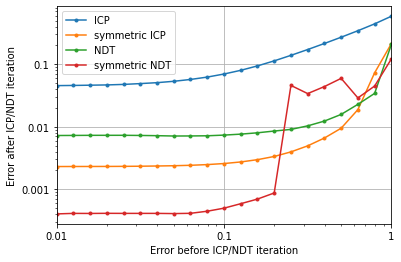

In [4]:
x = np.array([0.010000, 0.012589, 0.015849, 0.019953, 0.025119, 0.031623, 0.039811, 0.050119, 0.063096, 0.079433, 0.100000, 0.125893, 0.158489, 0.199526, 0.251189, 0.316228, 0.398107, 0.501187, 0.630957, 0.794328, 1.000000, ])
y1 = np.array([0.045437, 0.045741, 0.046171, 0.046618, 0.047515, 0.048969, 0.050664, 0.053305, 0.057034, 0.062229, 0.069652, 0.079831, 0.093950, 0.113078, 0.138605, 0.171632, 0.214592, 0.270225, 0.343268, 0.442081, 0.585127, ])
y3 = np.array([0.002307, 0.002311, 0.002313, 0.002316, 0.002323, 0.002335, 0.002354, 0.002377, 0.002416, 0.002479, 0.002577, 0.002732, 0.002972, 0.003344, 0.003958, 0.004944, 0.006595, 0.009465, 0.018778, 0.072837, 0.213607, ])
y5 = np.array([0.007236, 0.007256, 0.007283, 0.007289, 0.007292, 0.007252, 0.007193, 0.007101, 0.007119, 0.007165, 0.007346, 0.007611, 0.007995, 0.008531, 0.009059, 0.010320, 0.012311, 0.015741, 0.022812, 0.034142, 0.207413, ])
y7 = np.array([0.000403, 0.000411, 0.000410, 0.000412, 0.000411, 0.000411, 0.000411, 0.000408, 0.000412, 0.000445, 0.000498, 0.000587, 0.000696, 0.000871, 0.045773, 0.033894, 0.043896, 0.059374, 0.028903, 0.044741, 0.121424, ])
converge(x, y1, y3, y5, y7)